# Worksheet 4.1 - Spurious regression

In [50]:
library(tidyverse)
library(forecast)
library(repr) # Resizing the plots in jupyter
library(rugarch) 
library(readxl)
library(dynlm)
library(Hmisc)
library(gridExtra)

options(repr.plot.width=5, repr.plot.height=2.5)

In [51]:
n <- 1000
x <- c(1:n)

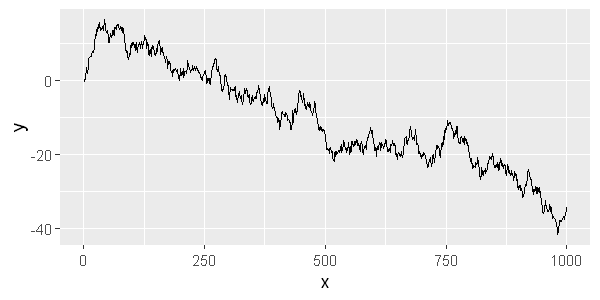

In [68]:
set.seed(4)

y <- cumsum(rnorm(n))

data <- data.frame(x, y)

ggplot() + 
    geom_line(data=data, aes(x, y))

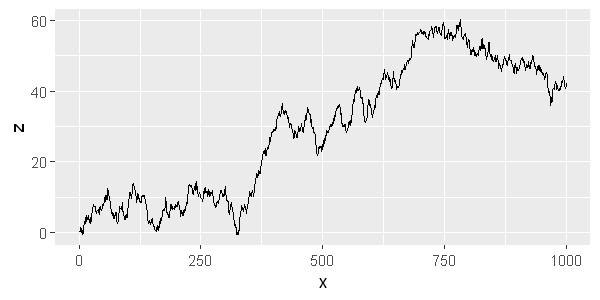

In [53]:
set.seed(16)

data$z <- cumsum(rnorm(n))

ggplot() + 
    geom_line(data=data, aes(x, z))

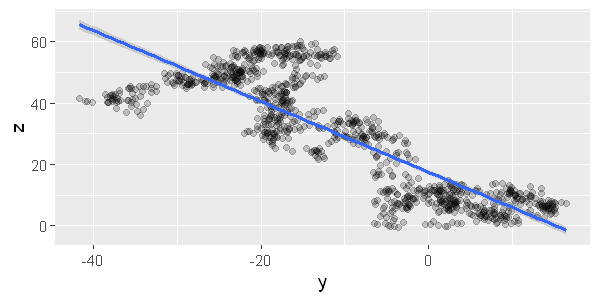

In [54]:
ggplot(data, aes(y,z)) + 
    geom_point(alpha=0.2) + 
    geom_smooth(method = "lm")

In [55]:
reg <- lm(y ~ z, data=data)
summary(reg)


Call:
lm(formula = y ~ z, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.0005  -4.3668   0.3076   4.8037  16.1560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.55514    0.43753   17.27   <2e-16 ***
z           -0.60891    0.01256  -48.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.445 on 998 degrees of freedom
Multiple R-squared:  0.7021,	Adjusted R-squared:  0.7018 
F-statistic:  2352 on 1 and 998 DF,  p-value: < 2.2e-16


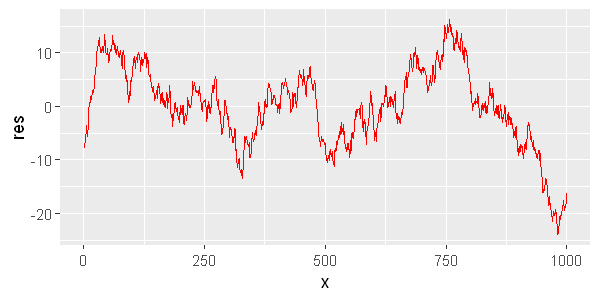

In [56]:
data$res <- resid(reg)

ggplot() + 
    geom_line(data=data, aes(x, res), color="red")

Series: data$res 
ARIMA(0,1,0) 

sigma^2 estimated as 1.332:  log likelihood=-1560.82
AIC=3123.64   AICc=3123.64   BIC=3128.54

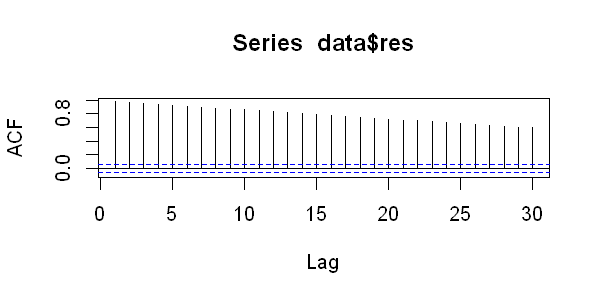

In [57]:
Acf(data$res)
auto.arima(data$res)

# CASE 1 - Both stationary

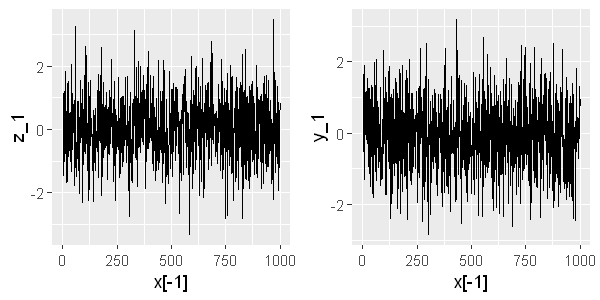

In [58]:
z_1 <- diff(data$z)

a <- ggplot() + 
   geom_line(aes(x[-1], z_1))

y_1 <- diff(data$y)

b <- ggplot() + 
   geom_line(aes(x[-1], y_1))

grid.arrange(a,b, nrow=1)


Call:
lm(formula = y_1 ~ z_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7396 -0.6328 -0.0077  0.6642  3.2302 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.03606    0.03071  -1.174    0.241
z_1          0.03313    0.03139   1.055    0.292

Residual standard error: 0.9697 on 997 degrees of freedom
Multiple R-squared:  0.001116,	Adjusted R-squared:  0.0001139 
F-statistic: 1.114 on 1 and 997 DF,  p-value: 0.2915


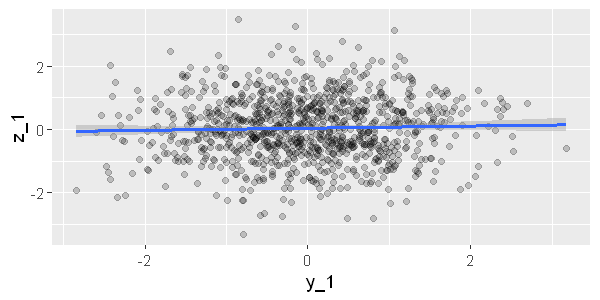

In [59]:
reg2 <- lm(y_1 ~ z_1)
summary(reg2)

df <- data.frame(y_1, z_1)

ggplot(df, aes(y_1, z_1)) + 
    geom_point(alpha=0.2) + 
    geom_smooth(method = "lm")

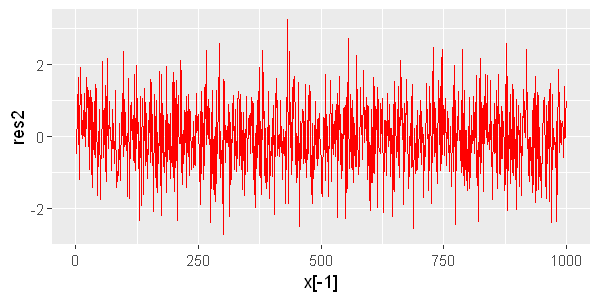

In [60]:
res2 <- resid(reg2)

ggplot() + 
    geom_line(aes(x[-1], res2), color="red")

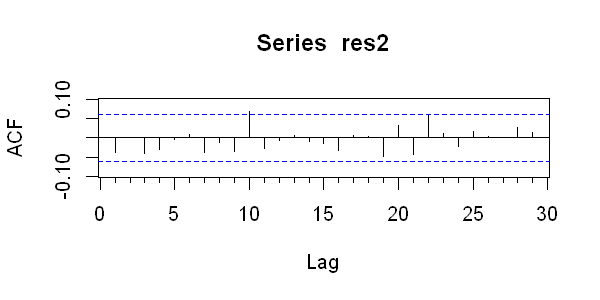

In [61]:
Acf(res2)

# CASE 2 - Integrated of different orders


Call:
lm(formula = y_1 ~ data$z[-1])

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8173 -0.6411 -0.0021  0.6709  3.2092 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0145635  0.0571109  -0.255    0.799
data$z[-1]  -0.0006842  0.0016381  -0.418    0.676

Residual standard error: 0.9702 on 997 degrees of freedom
Multiple R-squared:  0.0001749,	Adjusted R-squared:  -0.0008279 
F-statistic: 0.1745 on 1 and 997 DF,  p-value: 0.6763


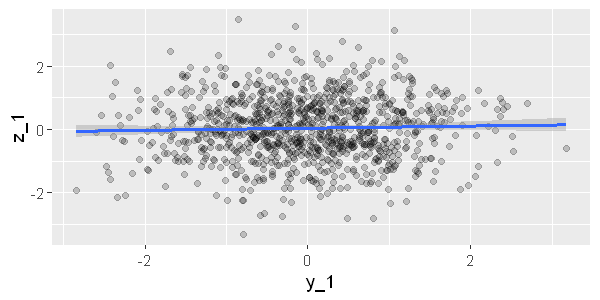

In [62]:
reg3 <- lm(y_1 ~ data$z[-1])
summary(reg3)

df <- data.frame(y_1, data$z[-1])

ggplot(df, aes(y_1, z_1)) + 
    geom_point(alpha=0.2) + 
    geom_smooth(method = "lm")

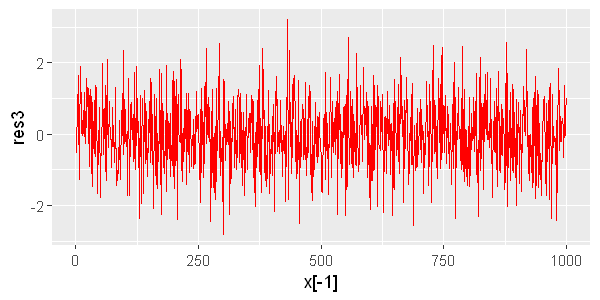

In [63]:
res3 <- resid(reg3)

ggplot() + 
    geom_line(aes(x[-1], res3), color="red")